# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [66]:
import numpy as np
import pandas as pd
import matplotlib as mpl

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset? 

In [7]:
print(df["YEAR"].nunique())

13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [27]:
states = df.groupby("STATE")
states19 = states["AVG_MATH_4_SCORE"].mean()
states19
# Ohio has the higher average score.

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your outcome score across all states in 2019

In [34]:
df[df["YEAR"] == 2019].mean()
# 239.943396

/var/folders/q9/2zqrh835663962td8gl6kmkw0000gn/T/ipykernel_39818/139109722.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df["YEAR"] == 2019].mean()


YEAR                            2019.000000
ENROLL_ALL_EST                          NaN
TOTAL_REVENUE                           NaN
FEDERAL_REVENUE                         NaN
STATE_REVENUE                           NaN
LOCAL_REVENUE                           NaN
TOTAL_EXPENDITURE                       NaN
INSTRUCTION_EXPENDITURE                 NaN
SUPPORT_SERVICES_EXPENDITURE            NaN
OTHER_EXPENDITURE                       NaN
CAPITAL_OUTLAY_EXPENDITURE              NaN
ENROLL_PREK                             NaN
ENROLL_KINDER                           NaN
ENROLL_4                                NaN
ENROLL_8                                NaN
ENROLL_12                               NaN
ENROLL_PRIMARY                          NaN
ENROLL_HS                               NaN
ENROLL_ALL                              NaN
AVG_MATH_4_SCORE                 239.943396
AVG_MATH_8_SCORE                 281.264151
AVG_READING_4_SCORE              219.792453
AVG_READING_8_SCORE             

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [36]:
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [37]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: Like the tutorial said, I know that more populated states will have more money to spend because they have more people, so this will take into account the difference in support service spending between more and less populated states.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

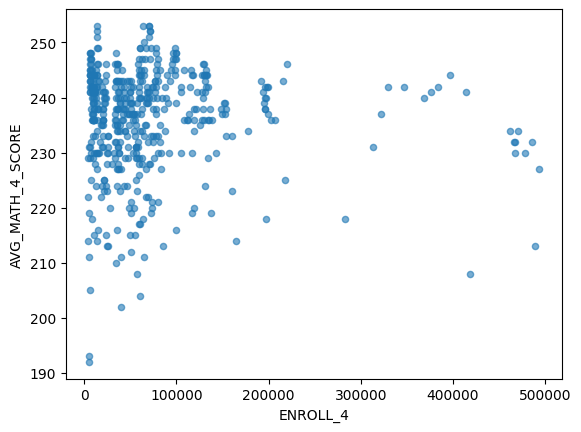

In [43]:

df.plot.scatter(x='ENROLL_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Math Score')

We can see that there is not a strong correlation between the number of 4th graders enrolled and the average 4th grade reading score.

**Visualization 2**

<AxesSubplot: xlabel='AVG_READING_4_SCORE', ylabel='AVG_MATH_4_SCORE'>

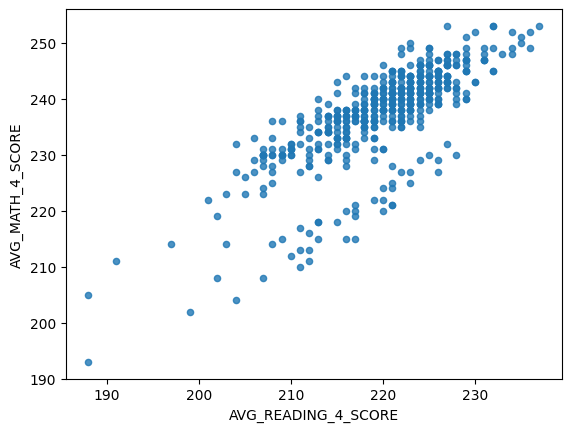

In [44]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.8)

There is a strong positive correlation between 4th grade reading scores and 4th grade math scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['ENROLL_4','AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# create your model here
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [53]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

2.842170943040401e-14
[-1.12990436e-21  1.00000000e+00  2.58202057e-17]


1.0

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [65]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")

TypeError: 'Figure' object is not callable

In [60]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")

TypeError: 'Figure' object is not callable

<h2> Summary </h2>

I cannot figure out how to graph these since the error that appears didn't show up in the tutorial even though both lines of code are the same. I tried troubleshooting but found nothing that could help. I assume that the model would work well on the training set and would also generalize nicely on the testing set.